In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


%config InlineBacked.figure_format = 'retina'

In [2]:
df = pd.read_csv("mall-customers-dataset.csv", index_col="CustomerID")
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


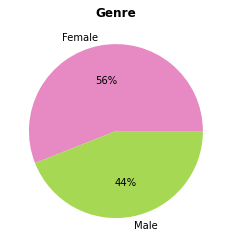

In [3]:
data = dict(df["Genre"].value_counts())
values = data.values()
labels = data.keys()
colors = sns.color_palette('Set2')[3:5]
plt.pie(x=values, labels=labels, autopct='%.0f%%', colors=colors);
plt.title("Genre", fontweight="bold");

# plt.savefig(fname=f"visualizations/genre-chart1.png",
#             dpi=300,
#             bbox_inches="tight",
#             pad_inches=0.2,
#             format='png'
#             )

In [4]:
def plot_dist(df, column):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.set_style("darkgrid")
    sns.countplot(data=df, x=column, label="Unit interval", ax=ax)
    ax.legend()
    ax.set(title=f"{column} distribution.",
           ylabel="")
#     plt.savefig(fname=f"visualizations/{column.lower()}-unit-interval-chart.png",
#             dpi=300,
#             bbox_inches="tight",
#             pad_inches=0.2,
#             format='png'
#             )

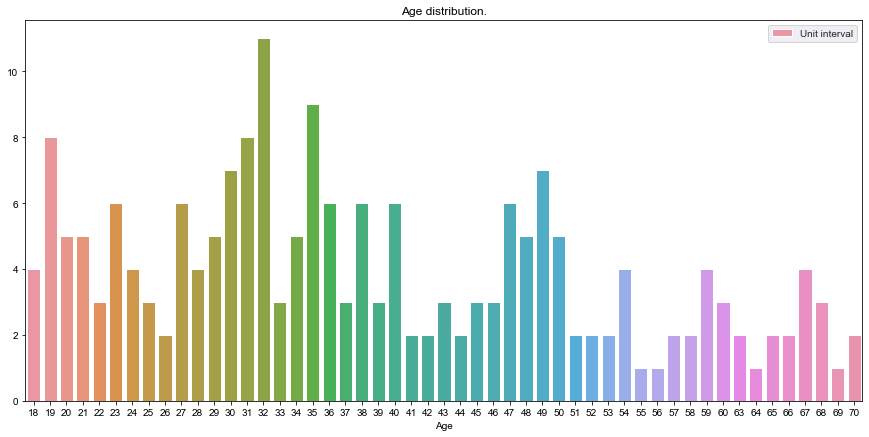

In [5]:
plot_dist(df, "Age")

In [6]:
df.Age.max(), df.Age.mean(), sorted(df.Age)[99], sorted(df.Age)[100]

(70, 38.85, 36, 36)

In [7]:
def bin_age(df, column="Age"):  
    bins1, bins2 = range(15, max(df[column])-4, 5), range(20, max(df[column])+1, 5)
    bins = np.c_[bins1, bins2]
    mov_averages = [(x[0] + x[1])/2 for x in bins]
    bins_labels = [f"{b[0]}-{b[1]}" for b in bins]
    heights = []
    for b in bins_labels:
        heights.append([])
    i = 0
    right = bins[i][1]
    for a in sorted(df[column].values):
        if a <= right:
            heights[i].append(a)
        else:
            i +=1
            right = bins[i][1]
            heights[i].append(a)
        
    for i, h in enumerate(heights):
        heights[i] = len(h)
    
    fig, ax = plt.subplots(figsize=(15,7))
    sns.set_style("darkgrid")
    sns.barplot(ax=ax, x=bins_labels, y=heights)
    ax.set(title=f"Age, binned distribution (interval={bins[0][1] - bins[0][0]})")
    ax.bar_label(container=ax.containers[0])
#     plt.savefig(fname=f"visualizations/{column.lower()}-binned-dist-chart.png",
#         dpi=300,
#         bbox_inches="tight",
#         pad_inches=0.2,
#         format='png'
#         )

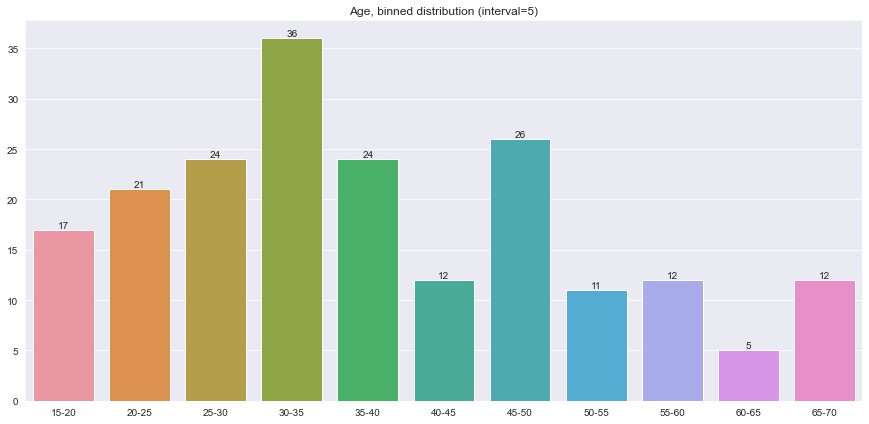

In [8]:
bin_age(df)

In [9]:
stats = dict()
for column in df.columns:
    income_dict = dict(df[column].describe())
    stats.update({column: income_dict})
    
stats = pd.DataFrame(data=stats).T.fillna(value="-")
stats

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Genre,200.0,2,Female,112,-,-,-,-,-,-,-
Age,200.0,-,-,-,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
Annual Income (k$),200.0,-,-,-,60.56,26.264721,15.0,41.5,61.5,78.0,137.0
Spending Score (1-100),200.0,-,-,-,50.2,25.823522,1.0,34.75,50.0,73.0,99.0


In [10]:
def plot_box(df, column, whis=1.5):
    fig, ax = plt.subplots(figsize=(15,7))
    sns.set_style("darkgrid")
    sns.boxplot(data=df, x=column, ax=ax, whis=whis)
    ax.set(title=f"Income distribution, whiskers={whis} IQR",
           xlabel="Thousands of dollars/year")
#     plt.savefig(fname=f"visualizations/income-chart.png",
#             dpi=300,
#             bbox_inches="tight",
#             pad_inches=0.2,
#             format='png'
#             )

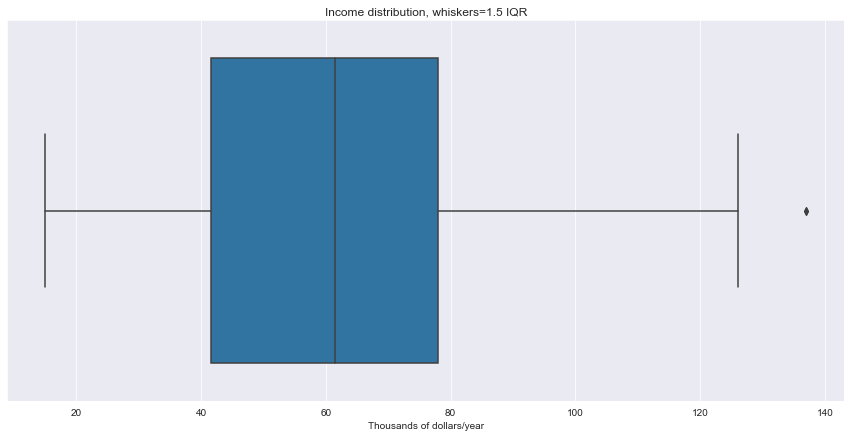

In [11]:
plot_box(df, "Annual Income (k$)")

In [12]:
df.Age.mean() * 200/201

38.656716417910445

In [13]:
def plot_box_bivariate(df, column1, column2=None, hue=None, whis=1.5):
    fig, ax = plt.subplots(figsize=(10,6))
    sns.set_style("darkgrid")
    sns.boxplot(ax=ax, data=df, x=column1, y=column2, hue=hue, whis=whis)
    ax.set(title=f"Joint distribution, '{column1}' & '{column2}'")
#     plt.savefig(fname=f"visualizations/joint-score-genre.png",
#         dpi=300,
#         bbox_inches="tight",
#         pad_inches=0.2,
#         format='png'
#         )

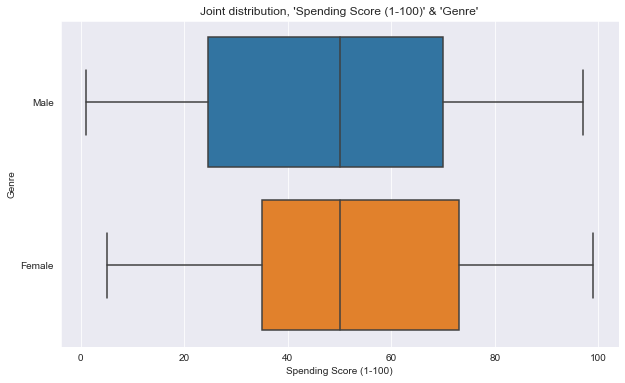

In [14]:
plot_box_bivariate(df, "Spending Score (1-100)", column2="Genre")

In [15]:
def plot_joint(df, column1, column2="Spending Score (1-100)"):
    sns.jointplot(data=df, x=column1, y=column2)
    ax = plt.gca()
    ax.set(title=f"Joint plot, '{column1}' & '{column2}'")

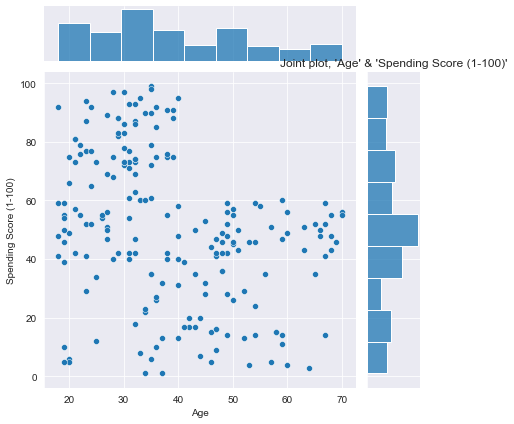

In [16]:
plot_joint(df, "Age")

In [17]:
def plot_reg(df, column1, column2="Spending Score (1-100)"):
    xx1 = df[column1].values.reshape(-1,1)
    xx2 = df[column2].values.reshape(-1,1)
    
    lr = LinearRegression()
    X_train, X_test, y_train, y_test = train_test_split(xx1, xx2, test_size=0.2)
    lr.fit(X_train, y_train)
    y_preds = lr.predict(X_test)
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.scatter(x=X_test, y=y_test, s=30, c="yellow", edgecolors="black", label="data points")
    ax.plot(X_test, y_preds, c="red", label="line of best fit")
    ax.set(title=f"Scatterplot, '{column2}' & '{column1}'",
           xlabel=f"{column1}",
           ylabel="Score")
    ax.legend()
#     plt.savefig(fname=f"visualizations/scatter-score-age.png",
#         dpi=300,
#         bbox_inches="tight",
#         pad_inches=0.2,
#         format='png'
#         )

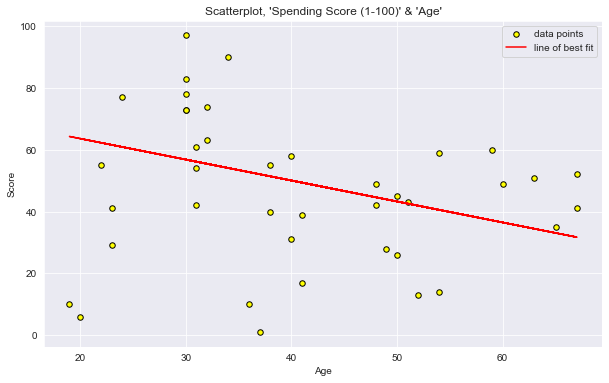

In [18]:
plot_reg(df, "Age")

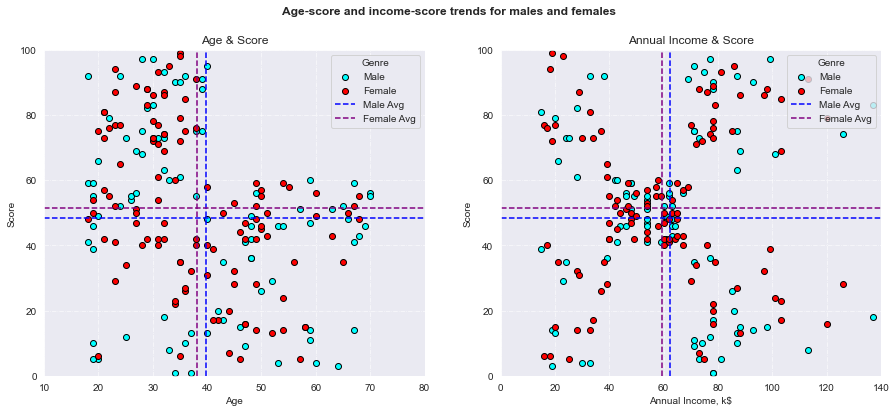

In [19]:
mall_customers = df.copy()

fig, (ax1, ax2) = plt.subplots(nrows=1,
                               ncols=2,
                               figsize=(15, 6))

fig.suptitle('Age-score and income-score trends for males and females', fontsize=12, fontweight='bold')

x = mall_customers['Age']
y = mall_customers['Spending Score (1-100)']
c = mall_customers['Genre']


males = np.array([])
females = np.array([])
for i in c.index:
    if c[i] == "Male":
        males = np.append(males, i)
    else:
        females = np.append(females, i)

ax1.scatter(x[males], y[males], color='cyan', edgecolors='black', label='Male')
ax1.scatter(x[females], y[females], color='red', edgecolors='black', label='Female')
ax1.axhline(y[males].mean(), color='blue', linestyle='--', label='Male Avg')
ax1.axvline(x[males].mean(), color='blue', linestyle='--')
ax1.axhline(y[females].mean(), color='purple', linestyle='--', label='Female Avg')
ax1.axvline(x[females].mean(), color='purple', linestyle='--')

ax1.set(title='Age & Score',
        xlabel='Age',
        ylabel='Score')

ax1.grid(visible=True, linestyle='-.', linewidth=0.7, alpha=0.8)
ax1.set_xlim([10, 80])
ax1.set_ylim([0, 100])

legend2 = ax1.legend(title='Genre', loc='upper right')

x = mall_customers['Annual Income (k$)']
y = y

ax2.scatter(x[males], y[males], color='cyan', edgecolors='black', label='Male')
ax2.scatter(x[females], y[females], color='red', edgecolors='black', label='Female')
ax2.axhline(y[males].mean(), color='blue', linestyle='--', label='Male Avg')
ax2.axvline(x[males].mean(), color='blue', linestyle='--')
ax2.axhline(y[females].mean(), color='purple', linestyle='--', label='Female Avg')
ax2.axvline(x[females].mean(), color='purple', linestyle='--')

ax2.set(title='Annual Income & Score',
        xlabel='Annual Income, k$',
        ylabel='Score')

ax2.grid(visible=True, linestyle='-.', linewidth=0.7, alpha=0.8)
ax2.set_xlim([0, 140])
ax2.set_ylim([0, 100])

ax2.legend(title='Genre', loc='upper right');

# plt.savefig(fname=f"visualizations/score-age-income.png",
#     dpi=300,
#     bbox_inches="tight",
#     pad_inches=0.2,
#     format='png'
#     )

In [20]:
df_scaled = df[["Annual Income (k$)", "Spending Score (1-100)"]].copy()

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_scaled)

In [21]:
ssd = []

for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)

In [22]:
def plot_inertia(ssd, clusters=range(1,11)):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(clusters, ssd, marker="8")
    ax.set(title="Elbow Curve",
           xlabel="Number of groups to separate points into.",
           ylabel="Sum of squared distances to closest center.",
           xlim=(0.5, 11))
    
    for x, y in zip(clusters, ssd):
        ax.text(x+0.1, y+5, s=f"{y:.2f}")
        
    ax.set_xticks(clusters)
    
#     plt.savefig(fname=f"visualizations/elbow1.png",
#     dpi=300,
#     bbox_inches="tight",
#     pad_inches=0.2,
#     format='png'
#     )

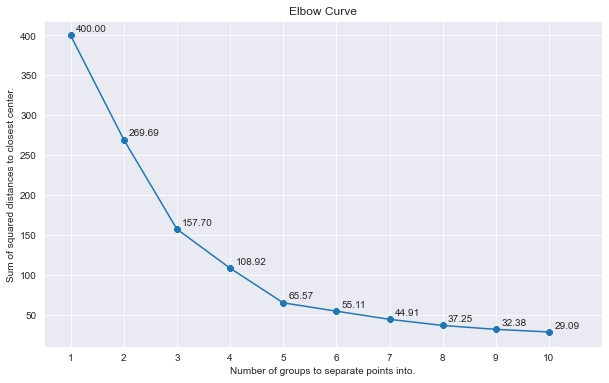

In [23]:
plot_inertia(ssd)

In [24]:
def plot_kmeans(df1, n_clusters=5):
    df = df1[["Annual Income (k$)", "Spending Score (1-100)"]]
    kmeans = KMeans(n_clusters=n_clusters, max_iter=50)
    df_scaled = StandardScaler().fit_transform(df)
    kmeans.fit(df_scaled)
    labels = pd.Series(data=kmeans.labels_, name="Labels").apply(lambda x: x+1).values
    
    fig, ax = plt.subplots(figsize=(10,6))
    sns.scatterplot(ax=ax, data=df, x="Annual Income (k$)", y="Spending Score (1-100)", s=60, hue=labels,
                     palette="bright")
    
#     ax.set(title="Grouping clients (n_groups=5)")
#     ax.legend(title="Groups")
#     plt.savefig(fname=f"visualizations/clustering.png",
#     dpi=300,
#     bbox_inches="tight",
#     pad_inches=0.2,
#     format='png'
#     )

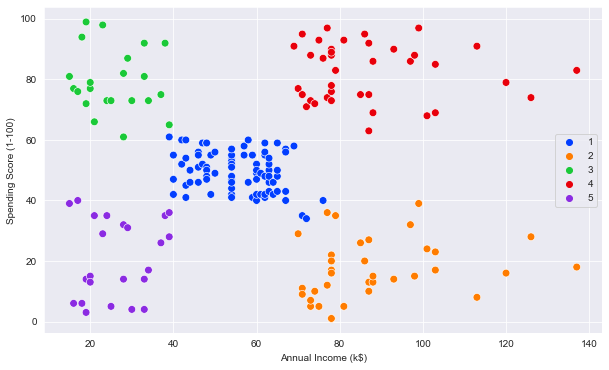

In [25]:
plot_kmeans(df)

In [26]:
kmeans = KMeans(n_clusters=5, max_iter=50)
df_scaled = StandardScaler().fit_transform(df[["Annual Income (k$)", "Spending Score (1-100)"]])
kmeans.fit(df_scaled)
labels = pd.DataFrame(data=kmeans.labels_, index=range(1,201), columns=["Labels"]).apply(lambda x: x+1)
labels = pd.DataFrame(labels.value_counts(), columns=["Counts"]).sort_index()
labels

,Counts
Labels,
1,35
2,22
3,39
4,23
5,81
